<a href="https://www.kaggle.com/code/tusharkhare06/project-1-restaurant-recommendation-system-indore?scriptVersionId=230029167" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-recommendation-system-indore/zomato_indore.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_excel("/kaggle/input/restaurant-recommendation-system-indore/zomato_indore.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2851 non-null   int64  
 1   Name              2851 non-null   object 
 2   Locality          2851 non-null   object 
 3   Cuisines          2851 non-null   object 
 4   avg_cost_for_two  2851 non-null   int64  
 5   aggregate_rating  2851 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 133.8+ KB


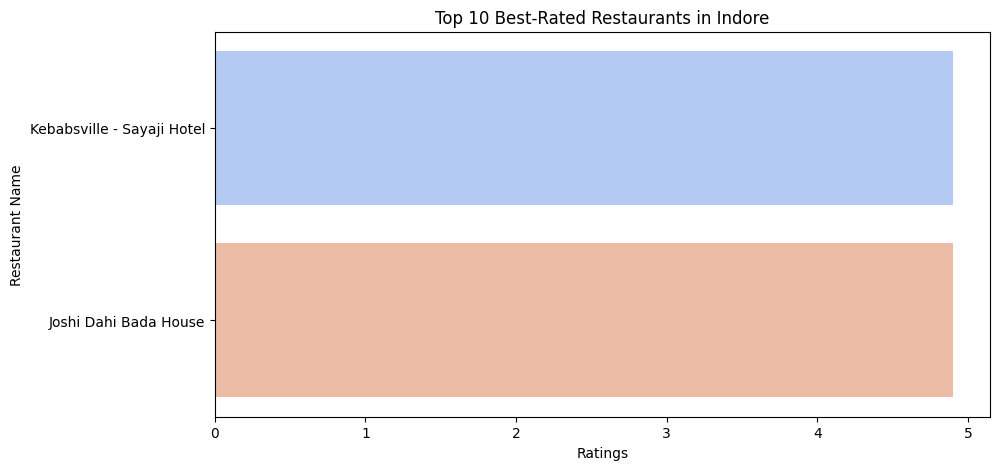

In [5]:
top_10 = df[['Name', 'aggregate_rating']].sort_values(by='aggregate_rating', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='aggregate_rating', y='Name', data=top_10, palette="coolwarm")
plt.xlabel("Ratings")
plt.ylabel("Restaurant Name")
plt.title("Top 10 Best-Rated Restaurants in Indore")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


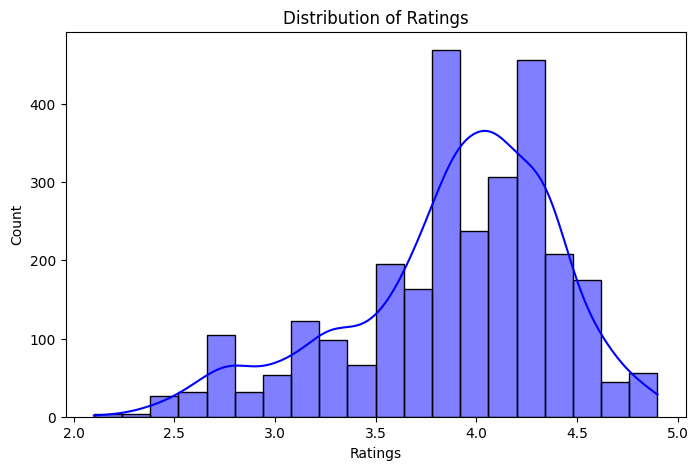

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['aggregate_rating'], bins=20, kde=True, color='blue')
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()


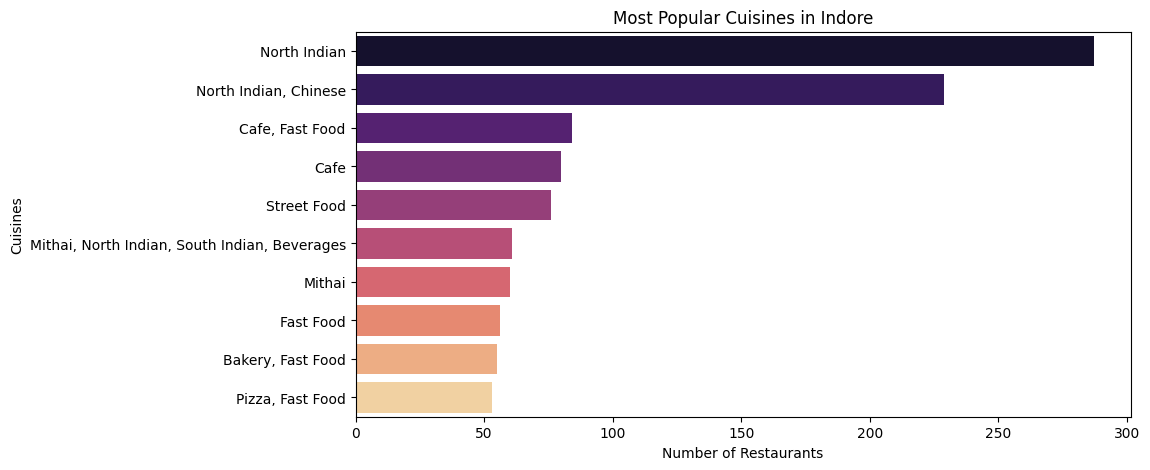

In [7]:
plt.figure(figsize=(10,5))
top_cuisines = df['Cuisines'].value_counts().head(10)

sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="magma")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisines")
plt.title("Most Popular Cuisines in Indore")
plt.show()


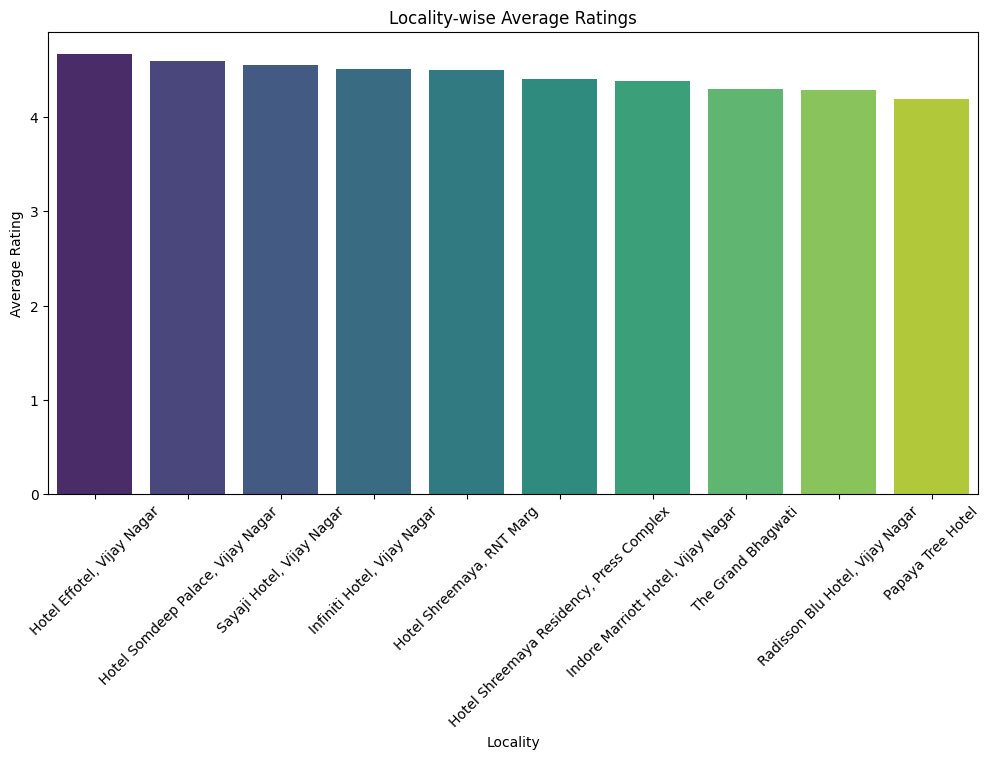

In [8]:
plt.figure(figsize=(12,6))
avg_ratings = df.groupby("Locality")["aggregate_rating"].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Locality")
plt.ylabel("Average Rating")
plt.title("Locality-wise Average Ratings")
plt.show()

In [9]:
df = df[['Locality', 'Cuisines', 'aggregate_rating', 'Name']]  # Keep only relevant columns  
df.dropna(inplace=True)  # Remove missing values  

In [10]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = ohe.fit_transform(df[['Locality', 'Cuisines']])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(['Locality', 'Cuisines']))

# Combine the encoded features with Rating & Restaurant Name
df_ml = pd.concat([encoded_df, df[['aggregate_rating', 'Name']]], axis=1)


In [11]:
X = df_ml.drop(columns=['aggregate_rating', 'Name'])  # Features  
y = df_ml['aggregate_rating']  # Target (Rating)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
knn = KNeighborsRegressor(n_neighbors=5)  # Using K=5  
knn.fit(X_train, y_train)  # Train the model  

KNeighborsRegressor()

In [13]:
def predict_best_restaurant(locality, cuisines):
    # Filter the DataFrame for the given locality and cuisine
    filtered_df = df[(df['Locality'] == locality) & (df['Cuisines'].str.contains(cuisines, case=False, na=False))]

    # If no match is found, return a message
    if filtered_df.empty:
        return "No matching restaurant found", None

    # Get the best-rated restaurant
    best_restaurant = filtered_df.sort_values(by='aggregate_rating', ascending=False).iloc[0]['Name']
    best_rating = filtered_df.sort_values(by='aggregate_rating', ascending=False).iloc[0]['aggregate_rating']

    return best_restaurant, best_rating

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Evaluation:")
print(f"🔹 Mean Squared Error (MSE): {mse:.4f}")
print(f"🔹 R² Score: {r2:.4f}")

📊 Model Evaluation:
🔹 Mean Squared Error (MSE): 0.1485
🔹 R² Score: 0.4952


In [15]:
locality = "Old Palasia"
cuisines = "Chinese"

restaurant, rating = predict_best_restaurant(locality, cuisines)
print(f"🍽️ Best Restaurant in {locality} for {cuisines}: {restaurant} with predicted rating ⭐ {rating}")

🍽️ Best Restaurant in Old Palasia for Chinese: Shree Gautam Chinese with predicted rating ⭐ 4.2


In [16]:
import pickle

# Save the trained KNN model
with open("restaurant_recommender.pkl", "wb") as file:
    pickle.dump(knn, file)

print("Model saved successfully as restaurant_recommender.pkl!")



Model saved successfully as restaurant_recommender.pkl!
